# Thinh Nguyen
# Comp Phys Exam 1
# Dr Olenick 

# PYTHON STUFF answers:
## 1a. 
np.arange allows you to define the stepsize and infers the number of steps
np.linspace allows you to define how many values you get including the specified min and max value. in this case np.linspace(1,10,100) will give an array of 100 elements from 1 to 10 including 1 to 10 whilst np.arange(1,10) will give an array with 10 elements from 1 to 10 without 10 and starting from 1.
## 1b. 
genfromtxt is more flexible to read and modify the data and also able to read missing values from different columns whilst loadtxt will throw an error if columns do not have the same amount of values. it's better to use genfromtxt to read a csv because it has more options to deal with a csv, especially an incomplete csv, also using loadtxt for a csv file requires you to instruct loadtxt to use a comma as the delimiter. 
## 1c.
vectorisation of math in python refers to data being processed as rows of data and columns of data. each row and each column are arrays containing values. for example, a data file with 2 columns and 4 rows: 
time distance <br>
132  32112<br>
321  5344<br>
757  54545<br>
the rows would be time and distance and both the values accordingly: [132 32112, 321 5344, 757 54545]
the columns would be time, and distance, with [132, 321, 757] for time and [32112, 5344, 54545] for distance
## 1d. 
#plot four graphs in separates panels with two graphs next to each other as inside one figure.
import matplotlib.pyplot as plt<br>
#assume we have 4 graphs a1,a2,a3,a4 ready to plot<br>
#plot a1 and a2 on the first figure<br>
plt.figure(1)<br>
fig, (ax1,ax2) = plt.subplots(1,2)<br>
ax1.plot(x1,y1)<br>
ax2.plot(x2,y2)<br>
#plot a3 and a4 on another figure<br>
plt.figure(2)<br>
fig, (ax3,ax4) = plt.subplots(1,2)<br>
ax3.plot(x3,y3)<br>
ax4.plot(x4,y4)<br>

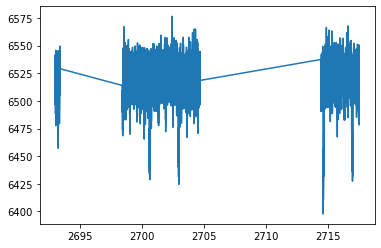

[[2714.629728 6397.7168     11.838534]
 [2714.626951 6409.0845     11.851465]
 [2714.640839 6410.7085     11.856163]
 ...
 [2698.517264 6567.2197     12.882081]
 [2716.626924 6567.8721     11.286789]
 [2702.421467 6576.5884     11.621808]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('WASP24TESSexcerpt.csv', delimiter=",")
x = data[:,0]
y = data[:,1]
error = data[:,2]
#plot a graph of WASP24TESSexcerpt
plt.plot(x,y)
#plt.errorbar(x,y,error,marker='o',color = 'b', capsize=4, ls='none')
plt.show()
#sorted WASP24TESSexcerpt by the 2nd column(smallest to greatest) and saved it in reordered.txt
ind=np.argsort(data[:,1])
rearrange = data[ind]
rewrite = str(rearrange)
newFile = open('reordered.txt', 'w+')
newFile.write(rewrite)
newFile.close()

file = open('reordered.txt', 'r')
print(file.read())


values in the first row of the rearranged data is [2714.629728 6397.7168     11.838534]


In [2]:
L = 100 # size of the lattice
L = L+1 # this is for the vector (0,0,0)
# n = 0 # number of atoms
M = 0 # Madelung constant
for i in range(-L,L+1):
    for j in range(-L,L+1):
        for k in range(-L,L+1):
            # n += 1 #counter for number of atoms
            if i == j == k == 0: # doesn't count the origin (0,0,0)
                continue
            r = (i**2 + j**2 + k**2)**(-0.5)
            if (i + j + k) % 2 == 1: # odd number
                r *= -1
            M += r
print ("Madelung Constant is:", M)

Madelung Constant is: -1.7532527746276183


For L = 100, the madelung constant = -1.7532527746276183


In [3]:
import math
import numpy as np
def factorial(n):
    if n == 0:
        return 1
    else:
        recurse = factorial(n-1)
        result = n * recurse
        return result


def estimate_pi(n):
    total = 0
    k = n
    factor = 2 * math.sqrt(2) / 9801
    while True:
        num = factorial(4*k) * (1103 + 26390*k)
        den = factorial(k)**4 * 396**(4*k)
        term = factor * num / den
        total += term
        
        if abs(term) < 1e-15:
            break
        k += 1

    return np.float64(1 / total)

print("When n = 1, pi estimate = {:50.45f}".format(estimate_pi(1)))
print(math.pi)
print("When n = 2, pi estimate = {:50.45f}".format(estimate_pi(2)))
print(math.pi)
print("When n = 0, pi estimate = {:50.45f}".format(estimate_pi(0)))
print(math.pi)

When n = 1, pi estimate = 129143562.346382588148117065429687500000000000000000000
3.141592653589793
When n = 2, pi estimate = 15432439203808632.000000000000000000000000000000000000000000000
3.141592653589793
When n = 0, pi estimate =    3.141592653589793115997963468544185161590576172
3.141592653589793


When n = 1, pi estimate = 129143562.346382588148117065429687500000000000000000000<br>
When n = 2, pi estimate = 15432439203808632.000000000000000000000000000000000000000000000<br>
When n = 0, pi estimate = 3.141592653589793115997963468544185161590576172<br>
pi value from the library = 3.141592653589793<br>
The series only really works when n = 0<br>


Number of data points =  186
A = 287074.04 +/- 1141.50, B = -143.24 +/- 0.57
chi-square = 2271.17
chi-square/dof =  12.34
r = -0.97
The best straight line fit is y = 287074.04 + -143.24x


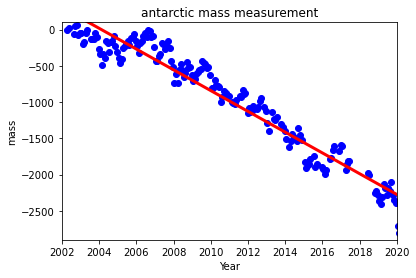

In [6]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('antarctica_mass_200204_202006.txt',float, skiprows=31)

x = np.array(data[:,0])  #independent variable
y = np.array(data[:,1])  #dependent variable
sig_y = np.array(data[:,2])
N = len(x)               #number of data points

#define least squares fit
def leastsqrs(x,y):
    #initialize our variables
    sum_x = 0
    sum_y = 0
    sum_xy = 0
    sum_xx = 0
    A = 0
    B = 0
   
    #perform sums
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_xy = np.inner(x,y)
   
    #determine the coefficients A and B
    Delta = N*sum_xx - sum_x*sum_x
    A = (sum_xx*sum_y - sum_x*sum_xy)/Delta
    B = (N*sum_xy - sum_x*sum_y)/Delta
    sig_A = np.mean(sig_y)*np.sqrt(np.sum(x*x)/Delta)
    sig_B = np.mean(sig_y)*np.sqrt(N/Delta)    
    return [A,B,sig_A,sig_B]

#calculate chi square
def chi_calc(x,y,sig_y,A,B):
    chi_square = 0
    chi_square = np.sum((y - (A + B*x))**2/(2*sig_y**2))
    # for i in range(0,len(sig_y)):
    #     chi_square = chi_square + (y[i] - (A + B*x[i]))**2/(2*sig_y[i]**2)
    return chi_square

def r(x,y):
    r = 0
    sum_diff_xy = 0
    sum_xdiff_sqr = 0
    sum_ydiff_sqr = 0
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    sum_xdiff_sqr = np.sum((x-x_bar)**2)
    sum_ydiff_sqr = np.sum((y-y_bar)**2)
    sum_diff_xy = np.sum((x-x_bar)*(y-y_bar))
    r = sum_diff_xy/np.sqrt(sum_xdiff_sqr*sum_ydiff_sqr)
    return r
coeffs = []
coeffs = leastsqrs(x,y)
A = coeffs[0]
B = coeffs[1]
sig_A = coeffs[2]
sig_B = coeffs[3]
chi_square = chi_calc(x, y, sig_y, A, B)

print('Number of data points = ', N)
print('A = {0:5.2f} +/- {2:5.2f}, B = {1:5.2f} +/-{3:5.2f}'.format(A,B,sig_A,sig_B))
print('chi-square = {0:5.2f}'.format(chi_square))
print('chi-square/dof = {0:6.2f}'.format(chi_square/(N-2)))
print("r = {0:5.2f}".format(r(x,y)))
print ('The best straight line fit is y = {0:4.2f} + {1:4.2f}x'.format(A, B))
#plot data pts and fit
plt.plot(x,y,"bo")
xc = np.linspace(min(x), max(x), 50)
yc = A+B*xc
plt.plot(xc,yc,'r-', linewidth=3)
plt.title('antarctic mass measurement')
plt.xlabel('Year')
plt.ylabel('mass')
plt.xlim(2002,2020)
plt.ylim(-2900,100)
plt.show()

Yearly and decadal changes in mass has a constant downwards trend, with some years the reduction is mass is less than others around 2004-2012, and dramatic reduction in mass around 2013-2020

In [8]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('Hubble.txt',float, skiprows=1)

x = np.array(data[:,0])  #independent variable
y = np.array(data[:,1])  #dependent variable
sig_y = np.array(data[:,2])
N = len(x)               #number of data points

#define least squares fit
def leastsqrs(x,y):
    #initialize our variables
    sum_x = 0
    sum_y = 0
    sum_xy = 0
    sum_xx = 0
    A = 0
    B = 0
   
    #perform sums
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_xy = np.inner(x,y)
   
    #determine the coefficients A and B
    Delta = N*sum_xx - sum_x*sum_x
    A = (sum_xx*sum_y - sum_x*sum_xy)/Delta
    B = (N*sum_xy - sum_x*sum_y)/Delta
    sig_A = np.mean(sig_y)*np.sqrt(np.sum(x*x)/Delta)
    sig_B = np.mean(sig_y)*np.sqrt(N/Delta)    
    return [A,B,sig_A,sig_B]

#calculate chi square
def chi_calc(x,y,sig_y,A,B):
    chi_square = 0
    chi_square = np.sum((y - (A + B*x))**2/(2*sig_y**2))
    # for i in range(0,len(sig_y)):
    #     chi_square = chi_square + (y[i] - (A + B*x[i]))**2/(2*sig_y[i]**2)
    return chi_square

def r(x,y):
    r = 0
    sum_diff_xy = 0
    sum_xdiff_sqr = 0
    sum_ydiff_sqr = 0
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    sum_xdiff_sqr = np.sum((x-x_bar)**2)
    sum_ydiff_sqr = np.sum((y-y_bar)**2)
    sum_diff_xy = np.sum((x-x_bar)*(y-y_bar))
    r = sum_diff_xy/np.sqrt(sum_xdiff_sqr*sum_ydiff_sqr)
    return r
coeffs = []
coeffs = leastsqrs(x,y)
A = coeffs[0]
B = coeffs[1]
sig_A = coeffs[2]
sig_B = coeffs[3]
chi_square = chi_calc(x, y, sig_y, A, B)

print('Number of data points = ', N)
print('A = {0:5.2f} +/- {2:5.2f}, B = {1:5.2f} +/-{3:5.2f}'.format(A,B,sig_A,sig_B))
print('chi-square = {0:5.2f}'.format(chi_square))
print('chi-square/dof = {0:6.2f}'.format(chi_square/(N-2)))
print("r = {0:5.2f}".format(r(x,y)))
print ('The best straight line fit is y = {0:4.2f} + {1:4.2f}x'.format(A, B))

Number of data points =  24
A = -36.04 +/- 14.30, B = 439.51 +/-12.67
chi-square = 505.72
chi-square/dof =  22.99
r =  0.78
The best straight line fit is y = -36.04 + 439.51x


In [10]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('Lemaitre.txt',float, skiprows=1)

x = np.array(data[:,0])  #independent variable
y = np.array(data[:,1])  #dependent variable
sig_y = np.array(data[:,2])
N = len(x)               #number of data points

#define least squares fit
def leastsqrs(x,y):
    #initialize our variables
    sum_x = 0
    sum_y = 0
    sum_xy = 0
    sum_xx = 0
    A = 0
    B = 0
   
    #perform sums
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_xy = np.inner(x,y)
   
    #determine the coefficients A and B
    Delta = N*sum_xx - sum_x*sum_x
    A = (sum_xx*sum_y - sum_x*sum_xy)/Delta
    B = (N*sum_xy - sum_x*sum_y)/Delta
    sig_A = np.mean(sig_y)*np.sqrt(np.sum(x*x)/Delta)
    sig_B = np.mean(sig_y)*np.sqrt(N/Delta)    
    return [A,B,sig_A,sig_B]

#calculate chi square
def chi_calc(x,y,sig_y,A,B):
    chi_square = 0
    chi_square = np.sum((y - (A + B*x))**2/(2*sig_y**2))
    # for i in range(0,len(sig_y)):
    #     chi_square = chi_square + (y[i] - (A + B*x[i]))**2/(2*sig_y[i]**2)
    return chi_square

def r(x,y):
    r = 0
    sum_diff_xy = 0
    sum_xdiff_sqr = 0
    sum_ydiff_sqr = 0
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    sum_xdiff_sqr = np.sum((x-x_bar)**2)
    sum_ydiff_sqr = np.sum((y-y_bar)**2)
    sum_diff_xy = np.sum((x-x_bar)*(y-y_bar))
    r = sum_diff_xy/np.sqrt(sum_xdiff_sqr*sum_ydiff_sqr)
    return r
coeffs = []
coeffs = leastsqrs(x,y)
A = coeffs[0]
B = coeffs[1]
sig_A = coeffs[2]
sig_B = coeffs[3]
chi_square = chi_calc(x, y, sig_y, A, B)

print('Number of data points = ', N)
print('A = {0:5.2f} +/- {2:5.2f}, B = {1:5.2f} +/-{3:5.2f}'.format(A,B,sig_A,sig_B))
print('chi-square = {0:5.2f}'.format(chi_square))
print('chi-square/dof = {0:6.2f}'.format(chi_square/(N-2)))
print("r = {0:5.2f}".format(r(x,y)))
print ('The best straight line fit is y = {0:4.2f} + {1:4.2f}x'.format(A, B))

Number of data points =  42
A = 302.14 +/- 14.49, B = 230.75 +/-10.04
chi-square = 4360.44
chi-square/dof = 109.01
r =  0.39
The best straight line fit is y = 302.14 + 230.75x


In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('Hubble.txt',float, skiprows=1)

x = np.array(data[:,0])  #independent variable
y = np.array(data[:,1])  #dependent variable
sig_y = np.array(data[:,2])
N = len(x)               #number of data points

#define least squares fit
def leastsqrs(x,y):
    #initialize our variables
    sum_x = 0
    sum_y = 0
    sum_xy = 0
    sum_xx = 0
    A = 0
    B = 0
   
    #perform sums
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_xy = np.inner(x,y)
   
    #determine the coefficients A and B
    Delta = N*sum_xx - sum_x*sum_x
    A = (sum_xx*sum_y - sum_x*sum_xy)/Delta
    B = (np.sum(x*y))/(np.sum(x*x))
    sig_A = np.mean(sig_y)*np.sqrt(np.sum(x*x)/Delta)
    sig_B = np.mean(sig_y)*np.sqrt(N/Delta)    
    return [A,B,sig_A,sig_B]

#calculate chi square
def chi_calc(x,y,sig_y,A,B):
    chi_square = 0
    chi_square = np.sum((y - (A + B*x))**2/(2*sig_y**2))
    # for i in range(0,len(sig_y)):
    #     chi_square = chi_square + (y[i] - (A + B*x[i]))**2/(2*sig_y[i]**2)
    return chi_square

def r(x,y):
    r = 0
    sum_diff_xy = 0
    sum_xdiff_sqr = 0
    sum_ydiff_sqr = 0
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    sum_xdiff_sqr = np.sum((x-x_bar)**2)
    sum_ydiff_sqr = np.sum((y-y_bar)**2)
    sum_diff_xy = np.sum((x-x_bar)*(y-y_bar))
    r = sum_diff_xy/np.sqrt(sum_xdiff_sqr*sum_ydiff_sqr)
    return r
coeffs = []
coeffs = leastsqrs(x,y)
A = 0
B = coeffs[1]
sig_A = coeffs[2]
sig_B = coeffs[3]
chi_square = chi_calc(x, y, sig_y, A, B)

print('Number of data points = ', N)
print('A = {0:5.2f} +/- {2:5.2f}, B = {1:5.2f} +/-{3:5.2f}'.format(A,B,sig_A,sig_B))
print('chi-square = {0:5.2f}'.format(chi_square))
print('chi-square/dof = {0:6.2f}'.format(chi_square/(N-2)))
print("r = {0:5.2f}".format(r(x,y)))
print ('The best straight line fit is y = {0:4.2f} + {1:4.2f}x'.format(A, B))



Number of data points =  24
A =  0.00 +/- 14.30, B = 412.91 +/-12.67
chi-square = 533.29
chi-square/dof =  24.24
r =  0.78
The best straight line fit is y = 0.00 + 412.91x


In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('Lemaitre.txt',float, skiprows=1)

x = np.array(data[:,0])  #independent variable
y = np.array(data[:,1])  #dependent variable
sig_y = np.array(data[:,2])
N = len(x)               #number of data points

#define least squares fit
def leastsqrs(x,y):
    #initialize our variables
    sum_x = 0
    sum_y = 0
    sum_xy = 0
    sum_xx = 0
    A = 0
    B = 0
   
    #perform sums
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_xy = np.inner(x,y)
   
    #determine the coefficients A and B
    Delta = N*sum_xx - sum_x*sum_x
    A = (sum_xx*sum_y - sum_x*sum_xy)/Delta
    B = (np.sum(x*y))/(np.sum(x*x))
    sig_A = np.mean(sig_y)*np.sqrt(np.sum(x*x)/Delta)
    sig_B = np.mean(sig_y)*np.sqrt(N/Delta)    
    return [A,B,sig_A,sig_B]

#calculate chi square
def chi_calc(x,y,sig_y,A,B):
    chi_square = 0
    chi_square = np.sum((y - (A + B*x))**2/(2*sig_y**2))
    # for i in range(0,len(sig_y)):
    #     chi_square = chi_square + (y[i] - (A + B*x[i]))**2/(2*sig_y[i]**2)
    return chi_square

def r(x,y):
    r = 0
    sum_diff_xy = 0
    sum_xdiff_sqr = 0
    sum_ydiff_sqr = 0
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    sum_xdiff_sqr = np.sum((x-x_bar)**2)
    sum_ydiff_sqr = np.sum((y-y_bar)**2)
    sum_diff_xy = np.sum((x-x_bar)*(y-y_bar))
    r = sum_diff_xy/np.sqrt(sum_xdiff_sqr*sum_ydiff_sqr)
    return r
coeffs = []
coeffs = leastsqrs(x,y)
A = 0
B = coeffs[1]
sig_A = coeffs[2]
sig_B = coeffs[3]
chi_square = chi_calc(x, y, sig_y, A, B)

print('Number of data points = ', N)
print('A = {0:5.2f} +/- {2:5.2f}, B = {1:5.2f} +/-{3:5.2f}'.format(A,B,sig_A,sig_B))
print('chi-square = {0:5.2f}'.format(chi_square))
print('chi-square/dof = {0:6.2f}'.format(chi_square/(N-2)))
print("r = {0:5.2f}".format(r(x,y)))
print ('The best straight line fit is y = {0:4.2f} + {1:4.2f}x'.format(A, B))

Number of data points =  42
A =  0.00 +/- 14.49, B = 412.87 +/-10.04
chi-square = 4086.00
chi-square/dof = 102.15
r =  0.39
The best straight line fit is y = 0.00 + 412.87x


Hubble's data set has a stronger correlation, Hubble's data set has a stronger chi-squared per degree of freedom. Hubble's data set has the Hubble-Lemaitre's constant remain nearly the same for both zero and non-zero intercept. Hubble's data is better because it has a much better fit, stronger correlation and a consistent slope of the straight line. 